In [1]:
import geopandas as gpd
import osmnx as ox

<Axes: >

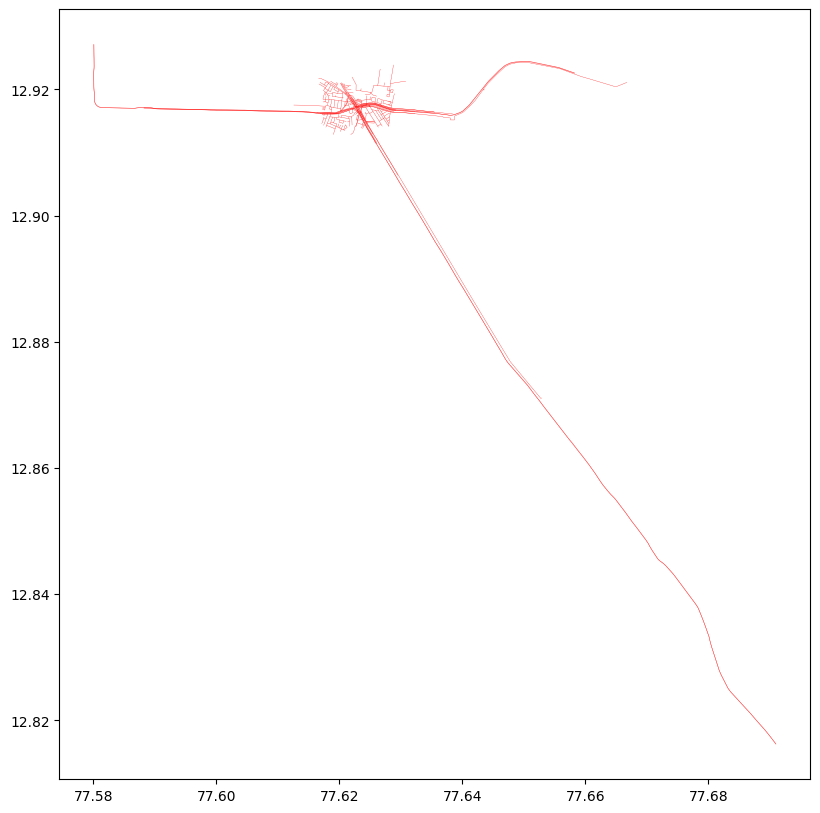

In [2]:
roads = gpd.read_file("map.osm", layer="lines")
roads.plot(figsize=(20,10), color="red", linewidth=0.2)


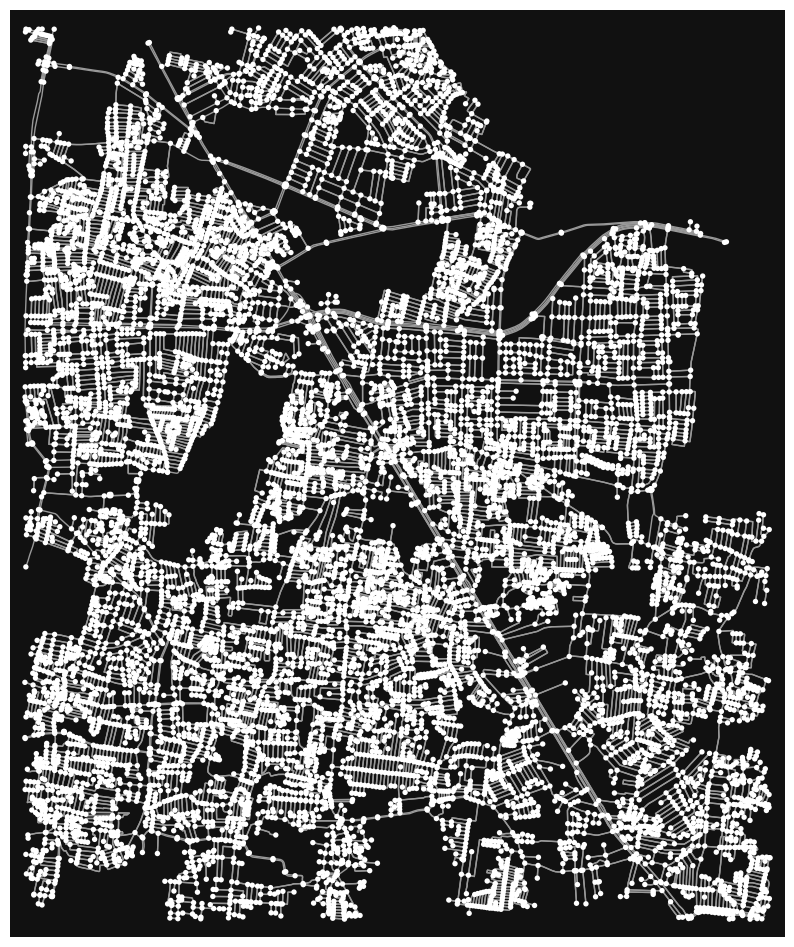

In [3]:
import matplotlib.pyplot as plt
# lbrt
G = ox.graph_from_bbox([77.60,12.87,77.66,12.94],network_type='drive')
fig, ax = ox.plot_graph(G, figsize=(10,30), edge_linewidth=1)

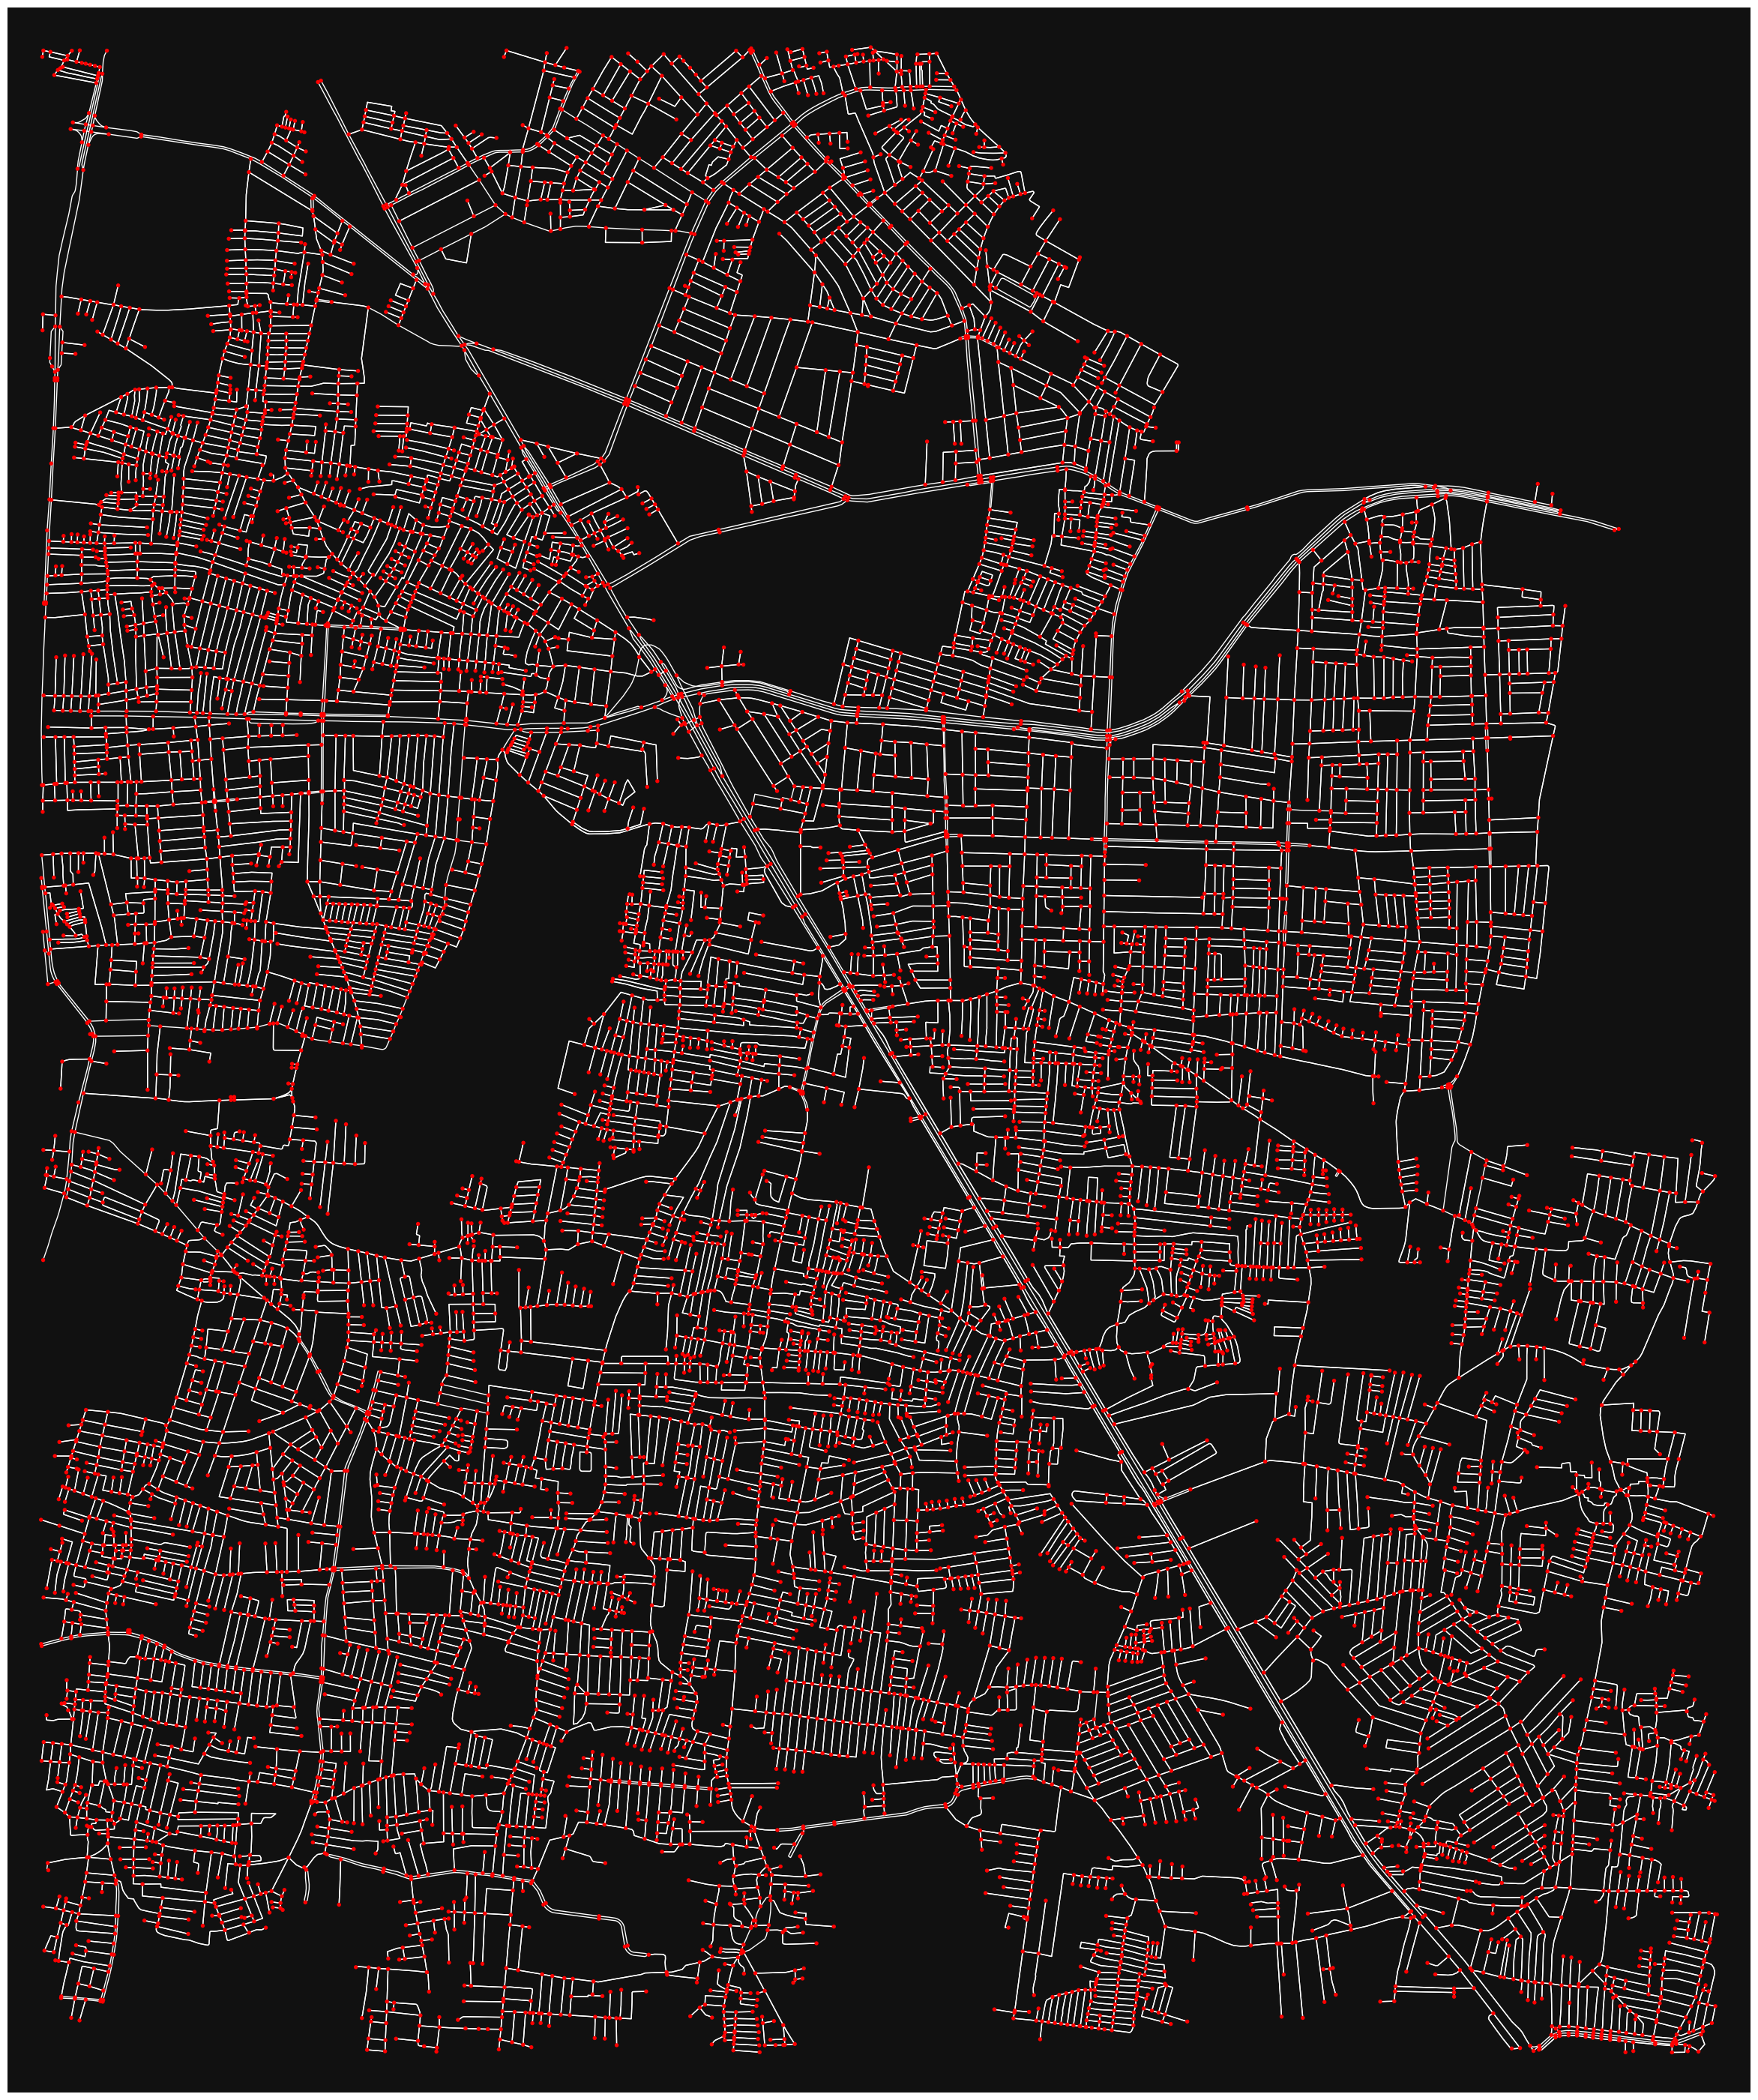

(<Figure size 3000x4000 with 1 Axes>, <Axes: >)

In [4]:
ox.plot_graph(G, figsize=(30, 40), node_color="red", edge_color="white")

In [5]:
nodes,edges=ox.graph_to_gdfs(G)

In [6]:
nodes.head()

y          x  street_count highway  \
osmid                                                   
17327139   12.934965  77.624072             3     NaN   
17327141   12.938493  77.629168             3     NaN   
245613696  12.924564  77.617992             3     NaN   
247852770  12.896237  77.608092             3     NaN   
247852771  12.897042  77.607138             3     NaN   

                            geometry  
osmid                                 
17327139   POINT (77.62407 12.93497)  
17327141   POINT (77.62917 12.93849)  
245613696  POINT (77.61799 12.92456)  
247852770  POINT (77.60809 12.89624)  
247852771  POINT (77.60714 12.89704)

In [7]:
nodes['highway'].value_counts()

highway
traffic_signals      21
motorway_junction     1
crossing              1
bus_stop              1
Name: count, dtype: int64

In [8]:
nodes['street_count'].value_counts()

street_count
3    7455
1    3006
4    1321
5      12
2       9
Name: count, dtype: int64

In [9]:
edges.head()

osmid      highway lanes                  name  \
u         v           key                                                       
17327139  443224605   0    111814615      primary     2  Mahayogi Vemana Road   
          309593057   0     28186701  residential   NaN        7th Cross Road   
17327141  956271706   0      8656177  residential   NaN         3rd Main Road   
          956271740   0    545604697      primary     2       Inner Ring Road   
245613696 10043935988 0    133763768      primary     2  Mahayogi Vemana Road   

                           oneway reversed      length  \
u         v           key                                
17327139  443224605   0      True    False   44.630750   
          309593057   0     False    False   50.303992   
17327141  956271706   0     False     True  100.510660   
          956271740   0      True    False   56.390557   
245613696 10043935988 0      True    False   26.885101   

                                                                    geometry  \
u         v           key                                                      
17327139  443224605   0    LINESTRING (77.62407 12.93497, 77.62437 12.93524)   
          309593057   0    LINESTRING (77.62407 12.93497, 77.62402 12.935...   
17327141  956271706   0    LINESTRING (77.62917 12.93849, 77.62888 12.939...   
          956271740   0    LINESTRING (77.62917 12.93849, 77.62938 12.938...   
245613696 10043935988 0    LINESTRING (77.61799 12.92456, 77.61821 12.92468)   

                          maxspeed access  ref width est_width bridge tunnel  \
u         v           key                                                      
17327139  443224605   0        NaN    NaN  NaN   NaN       NaN    NaN    NaN   
          309593057   0        NaN    NaN  NaN   NaN       NaN    NaN    NaN   
17327141  956271706   0        NaN    NaN  NaN   NaN       NaN    NaN    NaN   
          956271740   0        NaN    NaN  NaN   NaN       NaN    NaN    NaN   
245613696 10043935988 0         30    NaN  NaN   NaN       NaN    NaN    NaN   

                          junction  
u         v           key           
17327139  443224605   0        NaN  
          309593057   0        NaN  
17327141  956271706   0        NaN  
          956271740   0        NaN  
245613696 10043935988 0        NaN

In [10]:
edges.columns

Index(['osmid', 'highway', 'lanes', 'name', 'oneway', 'reversed', 'length',
       'geometry', 'maxspeed', 'access', 'ref', 'width', 'est_width', 'bridge',
       'tunnel', 'junction'],
      dtype='object')

In [11]:
edges['bridge'].value_counts()

bridge
yes    89
Name: count, dtype: int64

In [12]:
edges['name'].value_counts()


name
1st Main Road                                          316
1st Cross Road                                         314
7th Cross Road                                         285
5th Cross Road                                         264
3rd Cross Road                                         240
                                                      ... 
[6th Cross Road, 26th Main Road]                         1
[31st Main Road, 24th A Cross Road, 28th Main Road]      1
100 feet Road                                            1
[Sarjapur Road, Sarjapura Road]                          1
39 Cross Road                                            1
Name: count, Length: 375, dtype: int64

In [13]:
edges['highway'].value_counts()

highway
residential                     24079
tertiary                         3204
secondary                        1166
living_street                     246
primary                           225
trunk                             149
tertiary_link                      63
trunk_link                         58
unclassified                       38
primary_link                       34
secondary_link                     29
[living_street, residential]        7
[residential, living_street]        7
[tertiary, residential]             2
[primary, trunk]                    1
busway                              1
[primary_link, primary]             1
[primary, primary_link]             1
Name: count, dtype: int64

viz roads point of interests and other stuff

In [14]:
area= edges[edges['name'] == '7th Cross Road']

<Axes: >

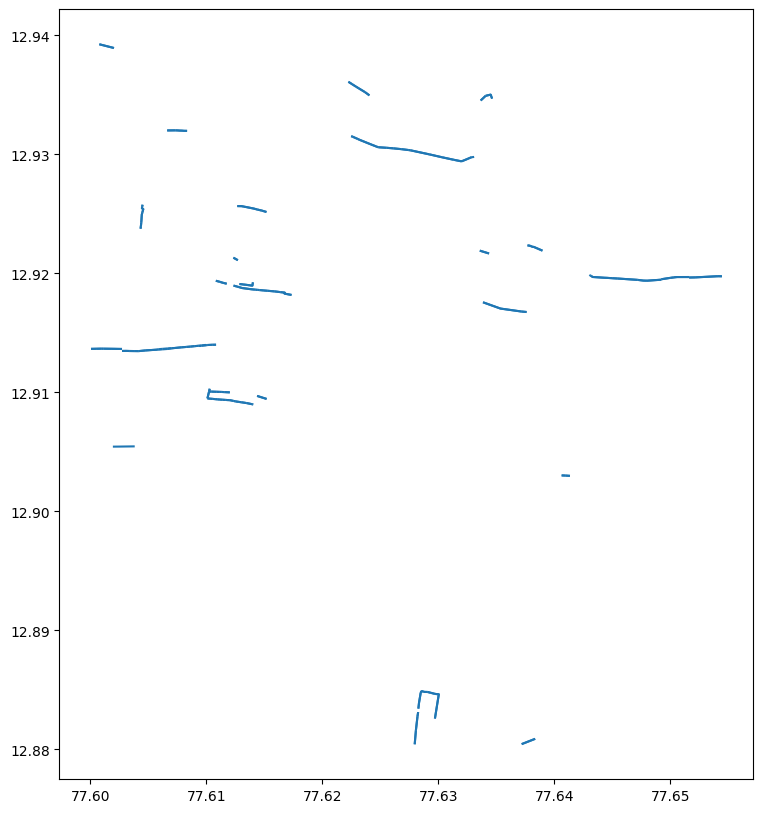

In [15]:
area.plot(figsize=(20,10))